## Predicting House Prices in King County,Seattle,WA,USA

In [108]:
import pandas as pd
import numpy as np

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns

In [110]:
%matplotlib inline

## Exploratory Data Analysis

In [111]:
df = pd.read_csv('kc_house_data.csv')

In [112]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [113]:
# All Zeroes , hence no missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [114]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


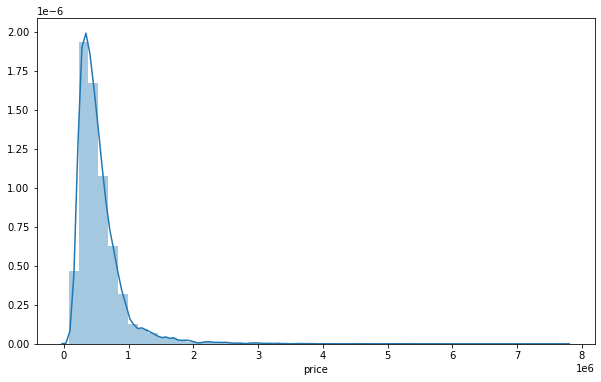

In [115]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

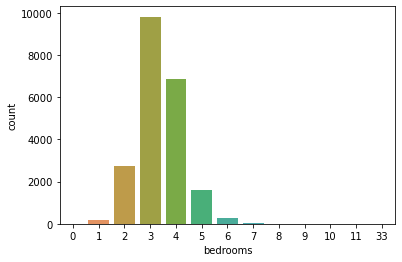

In [116]:
sns.countplot(df['bedrooms'])

In [117]:
 # Establishing a relation between price and house features
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

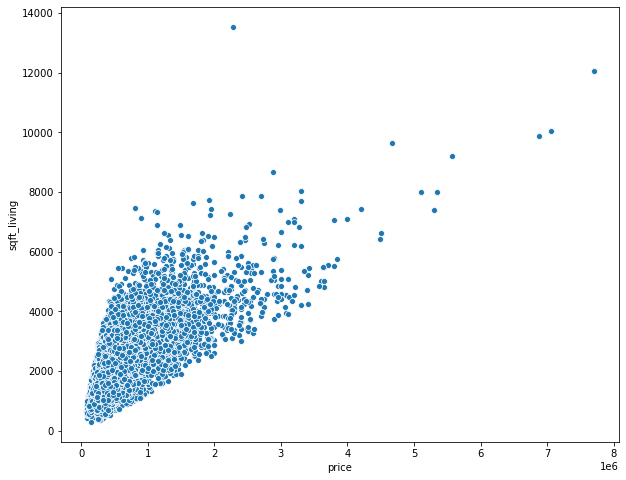

In [118]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

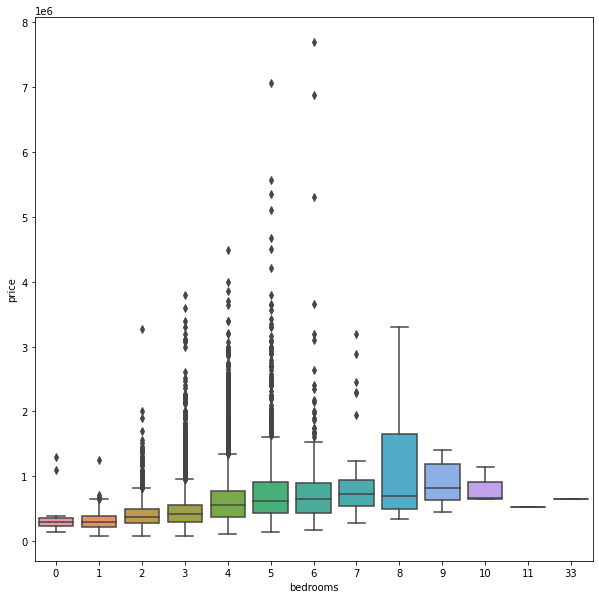

In [119]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='bedrooms',y='price')

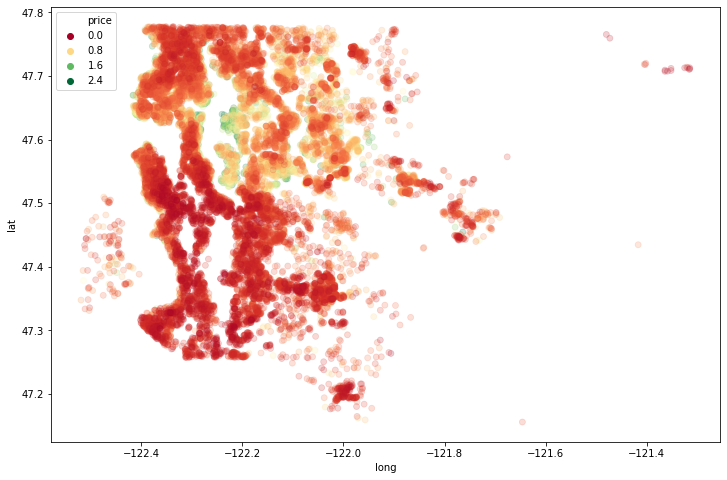

In [120]:
# Prices v Location Coordinates
# Top 1% Most expensive house dropped to get a more ideal plot
bot_99_perc = df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(12,8))
sns.scatterplot(data=bot_99_perc,x='long',y='lat',
                hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

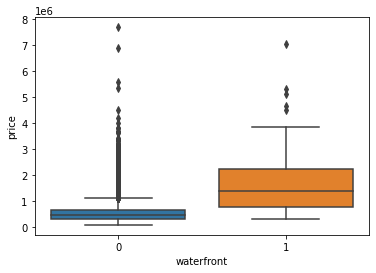

In [121]:
# Prices on waterfront houses
sns.boxplot(x='waterfront',y='price',data=df)

## Feature Engineering

In [122]:
df = df.drop('id',axis=1)

In [123]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [124]:
# Getting the year and month
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

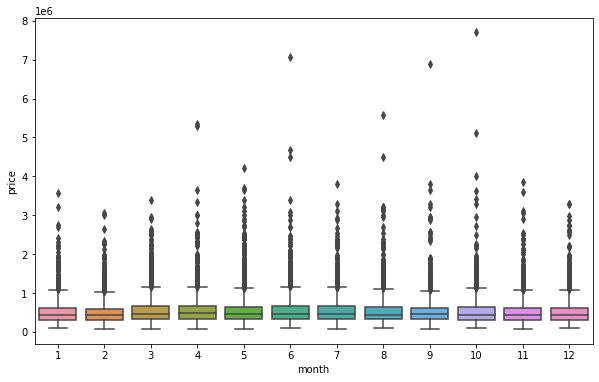

In [125]:
# Month v Price
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

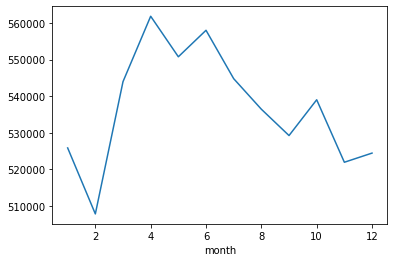

In [126]:
# Month v Price
df.groupby('month').mean()['price'].plot()

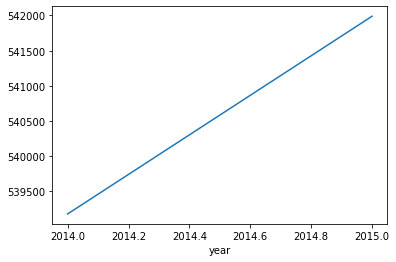

In [127]:
# Year v Price
df.groupby('year').mean()['price'].plot()

In [128]:
df = df.drop('date',axis=1)

In [129]:
df = df.drop('zipcode',axis=1)

## Data Pre-Processing

In [130]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
X_train = scaler.fit_transform(X_train)

In [136]:
X_test = scaler.transform(X_test)

## Creating the Data Model

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [138]:
X_train.shape

(15129, 19)

In [139]:
model = Sequential()

In [140]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [141]:
model.compile(optimizer='adam',loss='mse')

In [142]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 423630569472.0000 - val_loss: 433039409152.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 423040188416.0000 - val_loss: 430941241344.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 414452973568.0000 - val_loss: 410463731712.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 368965648384.0000 - val_loss: 330586456064.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 253669588992.0000 - val_loss: 187316158464.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 132243537920.0000 - val_loss: 109634502656.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 100226392064.0000 - val_loss: 103823884288.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97964695552.0000 - val_loss: 102402457600.0000
Epoch 9/400
119/1

## Model Evaluation and Predictions


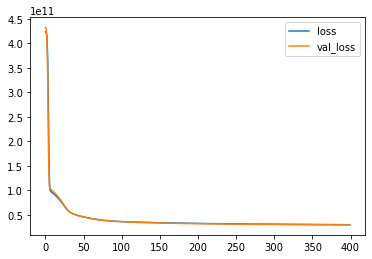

In [143]:
#Loss v Validation Loss
pd.DataFrame(model.history.history).plot()

In [144]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [145]:
predictions = model.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test,predictions))

171441.5959959124

In [147]:
explained_variance_score(y_test,predictions)

0.790475387211811

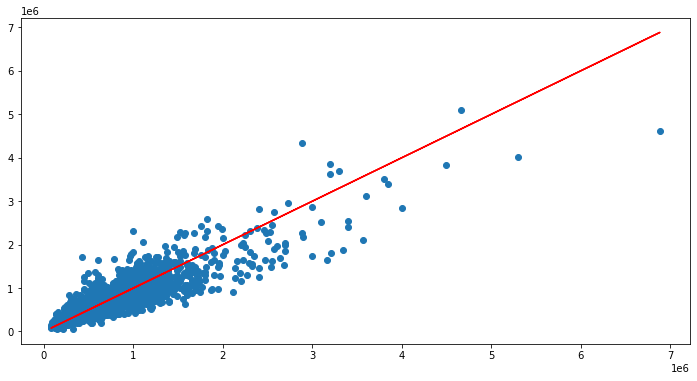

In [148]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [149]:
first_house = df.drop('price',axis=1).iloc[0]

In [150]:
first_house = scaler.transform(first_house.values.reshape(-1,19))

In [151]:
model.predict(first_house)

array([[284355.44]], dtype=float32)

In [152]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
